## DS Look on: Продажа новых квартир в Астане (Нур-Султан) by krisha.kz


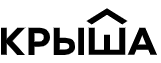

Интро: В данном блокноте будет проведен анализ цен на квартиры в новых ЖК(новостройки) опубликованные на сайте объявлений krisha.kz за 07.09.2020
Данные были собраны, обработаны и проанализированы с сайта krisha.kz , используя Python и его библиотек. Выборка состоит из 167 квартир, опубликованными отделами продаж застройщиков.


P.S данная выборка слишком мала, поэтому не следует принимать решения, опираясь только на этот блокнот.
#### P.S.S. Все мнения и доводы, касаются только данную выборку и не описывают текущее положение рынка недвижимости города Нур-Султан

## Обзор:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
xls = pd.ExcelFile(r"krysha.xlsx")

In [3]:
data= pd.read_excel(xls, 'Sheet1')

In [4]:
data["Цена за м2"]=data["Цена (тнг)"]/data["Площадь (м2)"]

In [29]:
data

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
0,0,«Ботанический»,«BI Group»,117.21,3,\n жил. комплекс Ботаническ...,55487214,4.41,63.63,3.0,473400.000000
1,1,«Vela Village»,«BI Group»,219.83,5,\n жил. комплекс Vella Vill...,86261292,16.92,90.53,3.6,392400.000000
2,2,«Alau»,«АстанаТехСтрой»,44.22,1,"\n жил. комплекс Alau, 19 э...",15477000,NaN,NaN,3.0,350000.000000
3,3,«Headliner»,«BI Group»,111.94,3,"\n жил. комплекс Headliner,...",42258294,NaN,NaN,3.0,377508.433089
4,4,«College»,«ТОО Фаворит Строй»,60.96,2,"\n жил. комплекс College, 9...",16443000,10.40,32.78,3.0,269734.251969
...,...,...,...,...,...,...,...,...,...,...,...
162,162,«Казанат 2»,«ЖСК Жануя Инвест»,61.00,2,"\n жил. комплекс Казанат 2,...",12200000,NaN,NaN,2.8,200000.000000
163,163,«Казанат 2»,«ЖСК Жануя Инвест»,44.93,1,"\n жил. комплекс Казанат 2,...",8986000,NaN,NaN,2.8,200000.000000
164,164,«ASQAT»,«Asti Group»,56.07,2,"\n жил. комплекс ASQAT, 7 э...",15979950,10.25,27.62,2.7,285000.000000
165,165,«ASQAT»,«Asti Group»,57.53,2,"\n жил. комплекс ASQAT, 7 э...",16396050,9.83,32.14,2.7,285000.000000


## Только о цифрах

In [6]:
data.describe()

,Unnamed: 0,Площадь (м2),Количество комнат,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
count,167.00000,167.000000,167.000000,1.670000e+02,152.000000,152.000000,157.000000,167.000000
mean,83.00000,77.505988,2.215569,2.641228e+07,12.599013,41.309868,2.877070,310820.067431
std,48.35287,35.872727,0.957656,1.882447e+07,4.171492,21.210581,0.145828,103097.947993
min,0.00000,32.220000,1.000000,4.662000e+06,1.900000,9.800000,2.700000,140000.000000
25%,41.50000,47.900000,1.000000,1.111412e+07,9.717500,20.947500,2.700000,250000.000000
50%,83.00000,68.140000,2.000000,1.901286e+07,11.990000,37.140000,3.000000,290000.000000
75%,124.50000,103.495000,3.000000,3.821538e+07,15.112500,58.032500,3.000000,384300.000000
max,166.00000,219.830000,5.000000,9.169000e+07,29.130000,93.750000,3.600000,522223.472488


### Топ 10 низких цен за квадрат 

In [7]:
data.drop_duplicates(subset=['ЖК']).nsmallest(10, 'Цена за м2')

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
109,109,«Байсал»,«Береке Курылыс 2030»,52.90,2,"\n жил. комплекс Байсал, 6 ...",7406000,14.90,23.60,2.8,140000.000000
13,13,«Tulpar City»,«AIZ QURYLYS ТОО»,39.75,1,\n жил. комплекс Tulpar Cit...,7155000,10.36,18.60,2.7,180000.000000
157,157,«Казанат 2»,«ЖСК Жануя Инвест»,41.87,1,"\n жил. комплекс Казанат 2,...",8374000,NaN,NaN,2.8,200000.000000
15,15,«Алтын Отау»,«Алтын Отау ТОО»,37.02,1,\n жил. комплекс Алтын Отау...,9255000,12.77,15.39,2.8,250000.000000
10,10,«Эмир»,«GarInvest»,60.27,2,"\n жил. комплекс Эмир, 12 э...",15368850,10.24,31.39,3.0,255000.000000
4,4,«College»,«ТОО Фаворит Строй»,60.96,2,"\n жил. комплекс College, 9...",16443000,10.40,32.78,3.0,269734.251969
103,103,«Apple City»,«SAT-NS ТОО»,66.15,2,\n жил. комплекс Apple City...,19183500,15.12,31.34,3.0,290000.000000
134,134,«ASQAT»,«Asti Group»,34.04,1,"\n жил. комплекс ASQAT, 7 э...",10041800,9.74,15.45,2.7,295000.000000
2,2,«Alau»,«АстанаТехСтрой»,44.22,1,"\n жил. комплекс Alau, 19 э...",15477000,NaN,NaN,3.0,350000.000000
6,6,«Capital Park»,«BI Group»,48.75,2,\n жил. комплекс Capital Pa...,17476875,5.95,27.32,2.7,358500.000000


### Топ 10 высоких цен за квадрат 

In [8]:
data.drop_duplicates(subset=['ЖК']).nlargest(10, 'Цена за м2')

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
8,8,«Esil Riverside»,«BI Group»,127.00,3,\n жил. комплекс Esil River...,63538100,26.19,58.62,3.0,500300.000000
0,0,«Ботанический»,«BI Group»,117.21,3,\n жил. комплекс Ботаническ...,55487214,4.41,63.63,3.0,473400.000000
14,14,«Atlant»,«BI Group»,122.80,3,"\n жил. комплекс Atlant, 21...",53755913,15.22,68.20,3.0,437751.734528
5,5,«Grand Opera»,«BI Group»,132.25,3,\n жил. комплекс Grand Oper...,55994650,18.42,71.13,3.0,423400.000000
7,7,«BI City Tokyo»,«BI Group»,75.41,3,\n жил. комплекс BI City To...,30842690,6.20,44.52,NaN,409000.000000
1,1,«Vela Village»,«BI Group»,219.83,5,\n жил. комплекс Vella Vill...,86261292,16.92,90.53,3.6,392400.000000
148,148,«Nura Esil»,«BI Group»,48.00,1,"\n жил. комплекс Nura Esil,...",18412800,14.22,19.59,3.0,383600.000000
3,3,«Headliner»,«BI Group»,111.94,3,"\n жил. комплекс Headliner,...",42258294,NaN,NaN,3.0,377508.433089
6,6,«Capital Park»,«BI Group»,48.75,2,\n жил. комплекс Capital Pa...,17476875,5.95,27.32,2.7,358500.000000
2,2,«Alau»,«АстанаТехСтрой»,44.22,1,"\n жил. комплекс Alau, 19 э...",15477000,NaN,NaN,3.0,350000.000000


#### Самая дешевая квартира

In [9]:
data[data["Цена (тнг)"]==data["Цена (тнг)"].min()]

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
128,128,«Байсал»,«Береке Курылыс 2030»,33.3,1,"\n жил. комплекс Байсал, 6 ...",4662000,10.5,11.1,2.8,140000.0


#### Самая дорогая квартира

In [10]:
data[data["Цена (тнг)"]==data["Цена (тнг)"].max()]

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
42,42,«Esil Riverside»,«BI Group»,186.36,4,\n жил. комплекс Esil River...,91690000,19.32,93.75,3.0,492004.722043


## Статистика

#### "Чем больше квартира тем больше цена" by all people
Мы все знаем этот очевидный факт, это утверждение описывает отношение цены на площадь кв, то есть цену за 1 кв м
Давайте графически убедимся в этом

### ЦЕНА (тнг) vs ПЛОЩАДЬ (м2)

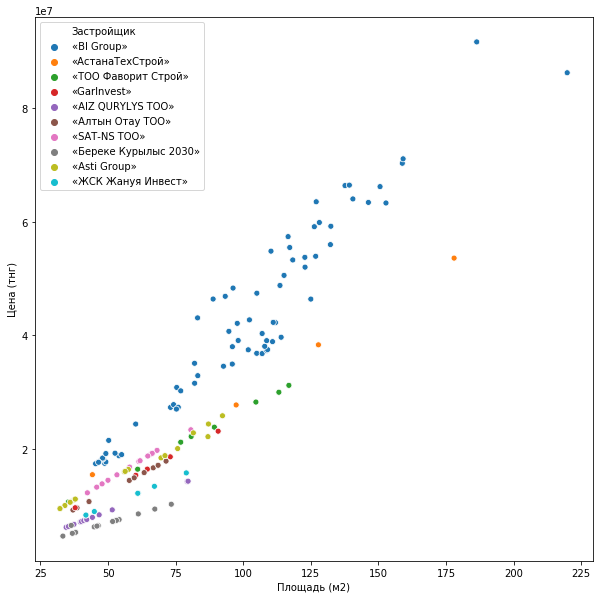

In [11]:
#scatter plot grlivarea/saleprice
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
var = 'Площадь (м2)'
ax=sns.scatterplot(x=var, y='Цена (тнг)',data=data,hue='Застройщик');

#### Наблюдения:
#### 1. Все затройщики, кроме BI Group имеют одинаковую тендецию отношения цены за площадь, когда у BI Group это цифра заметно больше
#### 2. Доминирующий затройщик с квартирами выше 125 м2 является BI Group

### ЦЕНА (тнг) vs КУХНЯ (м2)

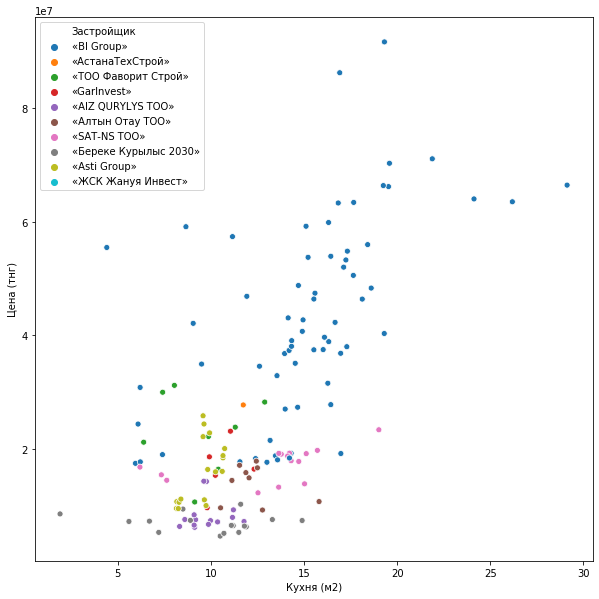

In [12]:

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
var = 'Кухня (м2)'
ax=sns.scatterplot(x=var, y='Цена (тнг)',data=data,hue='Застройщик');


#### Наблюдения:
#### 1. Этот график удобен для рассмотрения квартир с большой кухня для тех кто любит готовить и кому нужно пространство для этого. С другой стороны, могут присутсвовать холостяки кому кухня не так и важна

### ЦЕНА (тнг) vs ЖИЛ ПЛОЩАДЬ (м2)

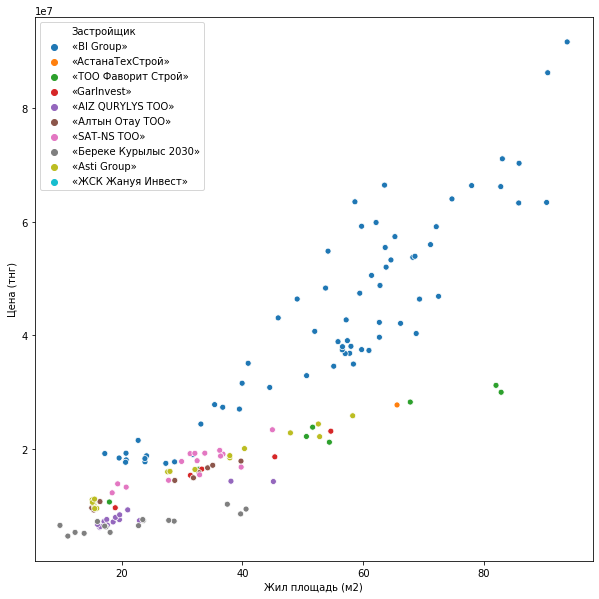

In [13]:
#scatter plot grlivarea/saleprice
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
var = 'Жил площадь (м2)'
ax=sns.scatterplot(x=var, y='Цена (тнг)',data=data,hue='Застройщик');

#### Наблюдения:
#### 1. Кучкующимся точками, вероятнее всего являются квартиры с одного ЖК

# Ящик с усами ( кто не знал русккого названия boxplot)

## Знакомство с ящиком с усами

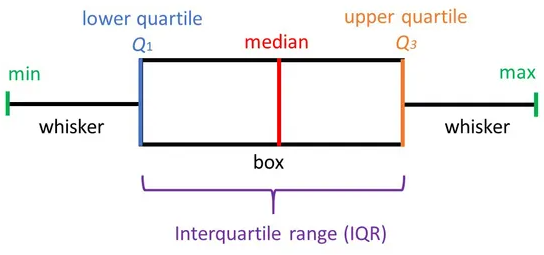

#### Нижний(min) и верхний(max) прочерк показывает минимальную и максимальную цену за квартиру,соответственно

#### Нижняя(Q1) и верхняя (Q3) граница прямоугольника показывает 25% квартиль и 75% квартиль, соответсвенно.
#### То есть Верхний квартиль(Q3) это граница значения цены за квартиру при которой 75% квратир имееют цену меньше, а
#### Нижний квартиль(Q1) это граница значения цены за квартиру при которой 25% квартир имеют значение меньше. 
#### Если сортировать цены за квартиры по возрастанию и выбрать центральное значение, это будет медианой(median).
#### Зеленая точка (mean) является значением средней ценой за квартиру.

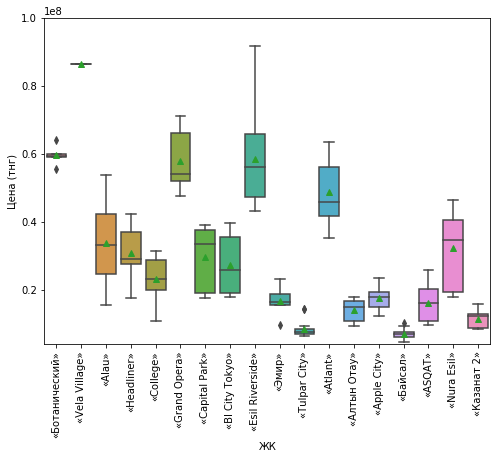

In [49]:
#box plot overallqual/saleprice
var = 'ЖК'
df = pd.concat([data['Цена (тнг)'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Цена (тнг)", data=df,showmeans=True)

fig.axis(ymin=4000000, ymax=100000000)
plt.xticks(rotation=90);## Знакомство с ящиком с усами![image.png](attachment:image.png)#### Нижний(min) и верхний(max) прочерк показывает минимальную и максимальную цену за квартиру,соответственно

#### Нижняя(Q1) и верхняя (Q3) граница прямоугольника показывает 25% квартиль и 75% квартиль, соответсвенно.
#### То есть Верхний квартиль(Q3) это граница значения цены за квартиру при которой 75% квратир имееют цену меньше, а
#### Нижний квартиль(Q1) это граница значения цены за квартиру при которой 25% квартир имеют значение меньше. 
#### Если сортировать цены за квартиры по возрастанию и выбрать центральное значение, это будет медианой(median).
#### Зеленая точка (mean) является значением средней ценой за квартиру.

#### Наблюдения:
#### 1. В 2х комнатных квартир много объявлений выбросов (outliers) завышенная цена и заниженная цена среди выборки
#### 2. В 3х комнатных квартирах значения выглядит  похожие на равномерное распределение, то есть усы примерно равноудалены и медиана находится по середине  

In [15]:
data.groupby('Количество комнат')['Цена (тнг)'].describe()

,count,mean,std,min,25%,50%,75%,max
Количество комнат,,,,,,,,
1,48.0,1.078850e+07,4.677502e+06,4662000.0,7211700.0,9522600.0,13429175.0,21519562.0
2,48.0,1.820881e+07,7.447013e+06,6496000.0,14815425.0,17304687.5,19390850.0,43090000.0
3,59.0,3.927391e+07,1.509672e+07,8568000.0,26804275.0,39081328.0,51299049.0,66468798.0
4,11.0,5.595974e+07,2.019330e+07,28266300.0,38804815.0,63324612.0,68263312.0,91690000.0
5,1.0,8.626129e+07,NaN,86261292.0,86261292.0,86261292.0,86261292.0,86261292.0


#### Давайте взглянем на эти квартиры(outliers)

In [16]:
data[data['Количество комнат']==2][data["Цена (тнг)"]>=25000000]

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
22,22,«Headliner»,«BI Group»,73.11,2,"\n жил. комплекс Headliner,...",27328518,NaN,NaN,3.0,373800.000000
34,34,«Headliner»,«BI Group»,74.25,2,"\n жил. комплекс Headliner,...",27814050,16.44,35.40,3.0,374600.000000
47,47,«Headliner»,«BI Group»,76.89,2,"\n жил. комплекс Headliner,...",30238871,NaN,NaN,3.0,393274.431005
48,48,«Atlant»,«BI Group»,82.00,2,"\n жил. комплекс Atlant, 21...",35096000,14.53,40.95,3.0,428000.000000
51,51,«Esil Riverside»,«BI Group»,83.12,2,\n жил. комплекс Esil River...,43090000,14.15,45.92,3.0,518407.122233
57,57,«Capital Park»,«BI Group»,75.98,2,\n жил. комплекс Capital Pa...,27352800,14.66,36.74,2.7,360000.000000
65,65,«Capital Park»,«BI Group»,82.03,2,\n жил. комплекс Capital Pa...,31581550,16.28,39.95,2.7,385000.000000
85,85,«BI City Tokyo»,«BI Group»,75.30,2,\n жил. комплекс BI City To...,27032700,13.99,39.50,NaN,359000.000000


In [17]:
data[data['Количество комнат']==2][data["Цена (тнг)"]<10000000]

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
109,109,«Байсал»,«Береке Курылыс 2030»,52.9,2,"\n жил. комплекс Байсал, 6 ...",7406000,14.9,23.6,2.8,140000.0
111,111,«Байсал»,«Береке Курылыс 2030»,46.4,2,"\n жил. комплекс Байсал, 6 ...",6496000,11.2,22.8,2.8,140000.0
117,117,«Байсал»,«Береке Курылыс 2030»,54.1,2,"\n жил. комплекс Байсал, 6 ...",7574000,13.3,23.5,2.8,140000.0
118,118,«Байсал»,«Береке Курылыс 2030»,52.1,2,"\n жил. комплекс Байсал, 6 ...",7294000,6.7,28.7,2.8,140000.0
119,119,«Байсал»,«Береке Курылыс 2030»,53.1,2,"\n жил. комплекс Байсал, 6 ...",7434000,8.9,27.8,2.8,140000.0
131,131,«Байсал»,«Береке Курылыс 2030»,51.7,2,"\n жил. комплекс Байсал, 6 ...",7238000,5.6,16.0,2.8,140000.0


Ими оказались наши топ застройщики по низким и высоким ценам за квадрат "Береку Курылыс 2030" и "BI Group", соответсвенно 

### Качество, сервис и репутация делают свое дело.
#### Приходим к выводу, что BI Group играет в другой лиге, так как все ЖК классом выше . Давайте попробуем посмотреть отдельное на BI и на всех остальных 
#### Классифицируем квартиры по СНиП, так как есть 2х комнатные квартире превосходящие по квадратуре 3х

In [21]:
data_bi=data[data["Застройщик"]=="«BI Group»"]
data_not_bi=data[data["Застройщик"]!="«BI Group»"]

In [23]:
labels = ['32-45', '46-56', '57-70', '71-84', '85-100', '101-111','112-125','125+']
bins = [32, 46, 57, 71, 85, 101, 112, 126,300]
data_bi['СНиП'] = pd.cut(data_bi["Площадь (м2)"], bins, labels = labels,include_lowest = True)

In [24]:
labels = ['32-45', '46-56', '57-70', '71-84', '85-100', '101-111','112-125','125+']
bins = [32, 46, 57, 71, 85, 101, 112, 126,300]
data_not_bi['СНиП'] = pd.cut(data_not_bi["Площадь (м2)"], bins, labels = labels,include_lowest = True)

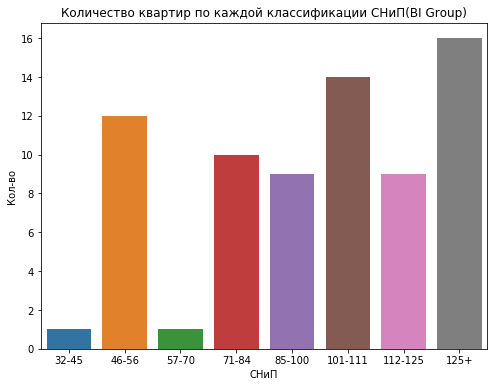

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data_bi["СНиП"])
ax.set_title('Количество квартир по каждой классификации СНиП(BI Group)')
ax.set_ylabel('Кол-во')
plt.show()

#### Наблюдения:
#### 1. В 2х комнатных квартир много объявлений выбросов (outliers) завышенная цена и заниженная цена среди выборки
#### 2. В 3х комнатных квартирах значения выглядит  похожие на равномерное распределение, то есть усы примерно равноудалены и медиана находится по середине  

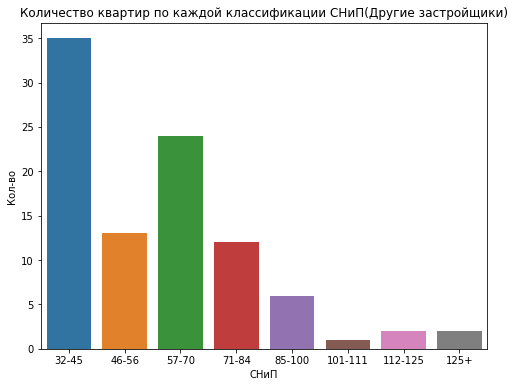

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data_not_bi["СНиП"])
ax.set_title('Количество квартир по каждой классификации СНиП(Другие застройщики)')
ax.set_ylabel('Кол-во')
plt.show()

### ЦЕНА (тнг) vs ПЛОЩАДЬ (м2)

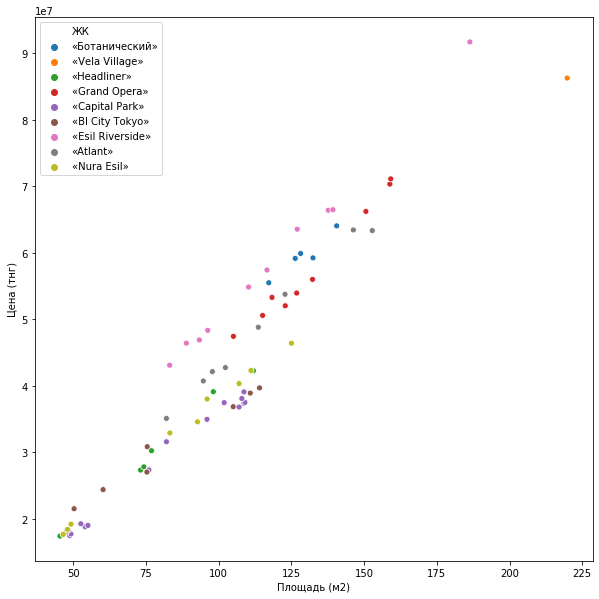

In [39]:
#scatter plot grlivarea/saleprice
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
var = 'Площадь (м2)'
ax=sns.scatterplot(x=var, y='Цена (тнг)',data=data_bi,hue='ЖК'### ЦЕНА (тнг) vs ПЛОЩАДЬ (м2));

### ЦЕНА (тнг) vs КУХНЯ (м2)

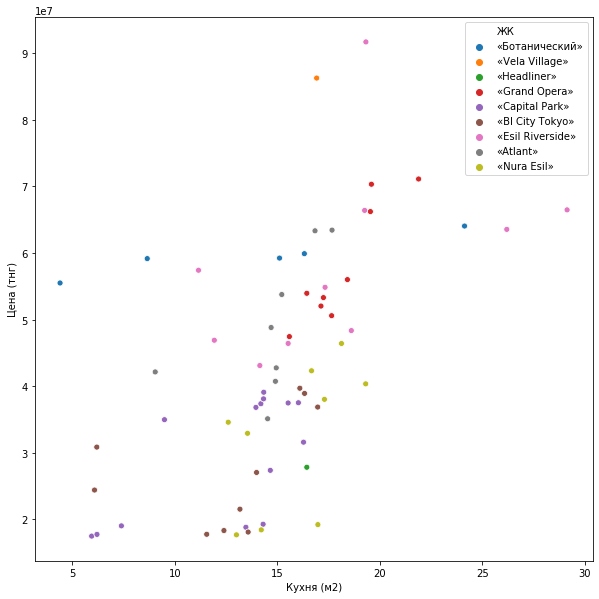

In [42]:

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
var = 'Кухня (м2)'
ax=sns.scatterplot(x=var, y='Цена (тнг)',data=data_bi,hue='ЖК');


### ЦЕНА (тнг) vs ЖИЛ ПЛОЩАДЬ (м2)

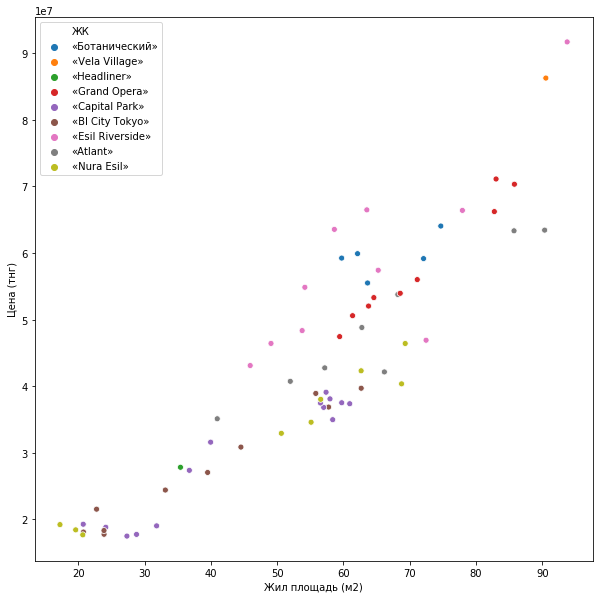

In [43]:
#scatter plot grlivarea/saleprice
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
var = 'Жил площадь (м2)'
ax=sns.scatterplot(x=var, y='Цена (тнг)',data=data_bi,hue='ЖК');

(-0.5, 7.5, 4000000, 100000000)

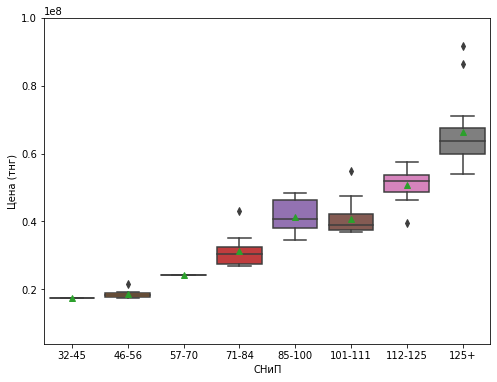

In [46]:
#box plot overallqual/saleprice
var = 'СНиП'
df = pd.concat([data_bi['Цена (тнг)'], data_bi[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Цена (тнг)", data=df,showmeans=True)

fig.axis(ymin=4000000, ymax=100000000)